# Introduction

This analysis aims to explore and extract relevant information from geographic and demographic data. Queries will be made on the country and city tables, focusing on obtaining details about the geographic distribution, demographic characteristics, and other key factors that may be useful for further analysis.


## Connection to the database


In [3]:
from sqlalchemy import create_engine, text
from sqlalchemy import URL
from sqlalchemy.orm import Session
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

# Load .env data
load_dotenv()

# Database configuration
url_object = URL.create(
    os.getenv("DB_DIALECT"),
    username=os.getenv("DB_USERNAME"),
    password=os.getenv("DB_PASSWORD"),
    host=os.getenv("DB_HOST"),
    database=os.getenv("DB_DATABASE"),
)

# Create engine using mysql-connector-python
engine = create_engine(url_object)


def read(query: str):
    """
    Executes a SQL query and returns the result as a DataFrame.
    """
    try:
        # Execute the query using the SQLAlchemy engine
        with engine.connect() as connection:
            df = pd.read_sql(query, connection)
        return df
    except Exception as err:
        print(f"Error: {err}")
        return None


def update(query: str):
    """
    Executes a SQL update
    """
    try:
        with engine.connect() as connection:
            with connection.begin():
                result = connection.execute(text(query))
                print(f"Query executed successfully. Rows affected: {result.rowcount}")
                return True
    except Exception as err:
        print(f"Error: {err}")
        return False

## SQL Queries

Below we will present some SQL queries that will be used to obtain different types of information from the database.


### Query 1: Population of Countries in Europe

This query will obtein the name and population of the countries in Europe continens. This allows us to see the population distribution across Europe.


In [3]:
df_query_1 = read(
    """
                    SELECT Name, Population FROM country WHERE Continent = "Europe"
                    ORDER BY Population DESC;
                    """
)
print(df_query_1, "\n")
df_query_1.info()

# Hay una coincidencia de 46 paises que pertenecen al continente Europeo.
# Los datos estan ordenados de mayor a menor poblacion

                             Name  Population
0              Russian Federation   146934000
1                         Germany    82164700
2                  United Kingdom    59623400
3                          France    59225700
4                           Italy    57680000
5                         Ukraine    50456000
6                           Spain    39441700
7                          Poland    38653600
8                         Romania    22455500
9                     Netherlands    15864000
10                     Yugoslavia    10640000
11                         Greece    10545700
12                 Czech Republic    10278100
13                        Belgium    10239000
14                        Belarus    10236000
15                        Hungary    10043200
16                       Portugal     9997600
17                         Sweden     8861400
18                       Bulgaria     8190900
19                        Austria     8091800
20                    Switzerland 

### Query 2: Countries with the largest surface area

This query retrieves the 5 countries with the largest surface area in the world.


In [7]:
df_query_2 = read(
    """SELECT  Name as name, SurfaceArea as surface_area FROM country 
                  ORDER BY SurfaceArea DESC LIMIT 5;"""
)

# Convert to millions
df_query_2["surface_area_millions"] = df_query_2["surface_area"] / 1e6
print(df_query_2, "\n")
df_query_2.info()
# The Russian Federation, Antarctica, Canada, China and The United States are the
# territory with the largest surface area in the world.

                 name  surface_area  surface_area_millions
0  Russian Federation    17075400.0               17.07540
1          Antarctica    13120000.0               13.12000
2              Canada     9970610.0                9.97061
3               China     9572900.0                9.57290
4       United States     9363520.0                9.36352 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   5 non-null      object 
 1   surface_area           5 non-null      float64
 2   surface_area_millions  5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 252.0+ bytes


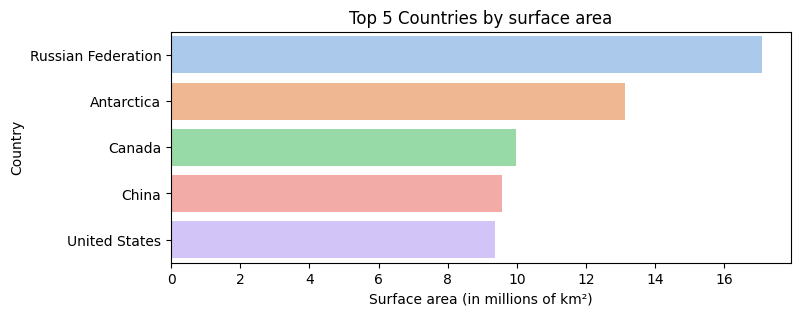

In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(
    x="surface_area_millions", y="name", data=df_query_2, hue="name", palette="pastel"
)
plt.title("Top 5 Countries by surface area")
plt.xlabel("Surface area (in millions of km²)")
plt.ylabel("Country")
plt.show()

### Query 3: Population by Continent

This query groups the countries by continen and sums the total population in each continent.


In [15]:
df_query_3 = read(
    """SELECT Continent as continent, SUM(Population) AS total_population 
                  FROM country GROUP BY Continent ORDER BY total_population DESC;"""
)

# convert to millions
df_query_3["population_millions"] = df_query_3["total_population"] / 1e6
df_query_3

,continent,total_population,population_millions
0,Asia,3.927468e+09,3927.46770
1,Africa,7.844750e+08,784.47500
2,Europe,7.300746e+08,730.07460
3,North America,4.829930e+08,482.99300
4,South America,3.457800e+08,345.78000
5,Oceania,3.040115e+07,30.40115
6,Antarctica,0.000000e+00,0.00000


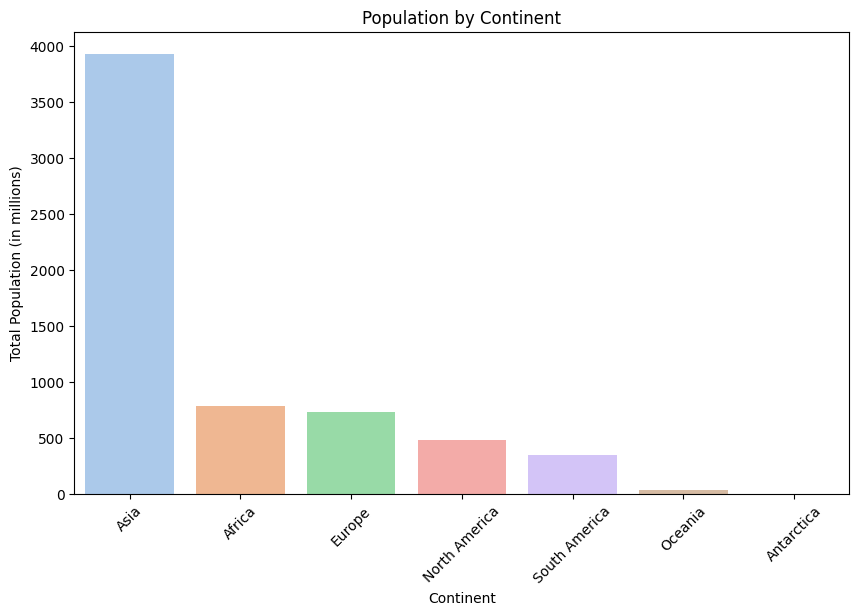

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="continent",
    y="population_millions",
    data=df_query_3,
    hue="continent",
    palette="pastel",
)
plt.title("Population by Continent")
plt.xlabel("Continent")
plt.ylabel("Total Population (in millions)")
plt.xticks(rotation=45)
plt.show()

### Query 4: Cities in Europe

This request retrieves the name and the population of the cities in the European continent.


In [20]:
cities_of_europe = read(
    """
                        SELECT city.Name as city_name, city.Population as population, 
                        country.code as country_code 
                        FROM city JOIN country ON (city.CountryCode = country.code) 
                        WHERE Continent = 'Europe';
                        """
)
cities_of_europe.info()
cities_of_europe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city_name     841 non-null    object
 1   population    841 non-null    int64 
 2   country_code  841 non-null    object
dtypes: int64(1), object(2)
memory usage: 19.8+ KB


,city_name,population,country_code
0,Tirana,270000,ALB
1,Andorra la Vella,21189,AND
2,Wien,1608144,AUT
3,Graz,240967,AUT
4,Linz,188022,AUT
...,...,...,...
836,Priština,155496,YUG
837,Kragujevac,147305,YUG
838,Podgorica,135000,YUG
839,Subotica,100386,YUG


In [ ]:
# Plotting the population of European cities.
from country_code_utils import identify_country_code
from country_code_utils import alpha3_to_alpha2

country_code_format = identify_country_code("AND")
print(f"ISO Format: {country_code_format}")

cities_of_europe["alpha2_country_code"] = cities_of_europe["country_code"].apply(
    alpha3_to_alpha2
)

filtered_df = cities_of_europe[cities_of_europe["alpha2_country_code"].isnull()]
cities_of_europe
filtered_df

ISO Format: ISO 3166-1 alpha-3


,city_name,population,country_code,alpha2_country_code
534,Bucuresti,2016131,ROM,None
535,Iasi,348070,ROM,None
536,Constanta,342264,ROM,None
537,Cluj-Napoca,332498,ROM,None
538,Galati,330276,ROM,None
539,Timisoara,324304,ROM,None
540,Brasov,314225,ROM,None
541,Craiova,313530,ROM,None
542,Ploiesti,251348,ROM,None
543,Braila,233756,ROM,None


In [4]:
identify_country_code("ROM")
# ROM is Rumania
# alpha-2 es RO
# alpha-3 ROU

# Replace values
cities_of_europe.loc[cities_of_europe["country_code"] == "ROM", "country_code"] = "ROU"
cities_of_europe["alpha2_country_code"] = cities_of_europe["country_code"].apply(
    alpha3_to_alpha2
)


# YUG is Serbia
# alpha-2 is RS
# alpha-3 is SRB

# Replace values
cities_of_europe.loc[cities_of_europe["country_code"] == "YUG", "country_code"] = "SRB"
cities_of_europe["alpha2_country_code"] = cities_of_europe["country_code"].apply(
    alpha3_to_alpha2
)

filtered_df = cities_of_europe[cities_of_europe["alpha2_country_code"].isnull()]
filtered_df

,city_name,population,country_code,alpha2_country_code


In [5]:
# Rename column 'country_code' to 'country_alpha3_code'
cities_of_europe.rename(columns={"country_code": "country_alpha3_code"}, inplace=True)
cities_of_europe

,city_name,population,country_alpha3_code,alpha2_country_code
0,Tirana,270000,ALB,AL
1,Andorra la Vella,21189,AND,AD
2,Wien,1608144,AUT,AT
3,Graz,240967,AUT,AT
4,Linz,188022,AUT,AT
...,...,...,...,...
836,Priština,155496,SRB,RS
837,Kragujevac,147305,SRB,RS
838,Podgorica,135000,SRB,RS
839,Subotica,100386,SRB,RS


In [6]:
from location import get_coordinates
import time

# Iterate over each row and retrieve the coordinates
for index, row in cities_of_europe.iterrows():
    city_name = row["city_name"]
    country_code = row["alpha2_country_code"]

    # Retrieve the coordinates with a pause to avoid overloading the service
    lat, lon = get_coordinates(city_name, country_code)
    # Pause for 1 second between each request
    time.sleep(1)
    print(city_name, country_code, lat, lon)
    # Assign the coordinates to Dataframe
    cities_of_europe.at[index, "latitude"] = lat
    cities_of_europe.at[index, "longitude"] = lon

Tirana AL 41.3281482 19.8184435
Andorra la Vella AD 42.5069391 1.5212467
Wien AT 48.2083537 16.3725042
Graz AT 47.0708678 15.4382786
Linz AT 48.3059078 14.286198
Salzburg AT 47.7981346 13.0464806
Innsbruck AT 47.2654296 11.3927685
Klagenfurt AT 46.623943 14.3075976
Antwerpen BE 51.2211097 4.3997081
Gent BE 51.0538286 3.7250121
Charleroi BE 50.4116233 4.444528
Liège BE 50.6450944 5.5736112
Bruxelles [Brussel] BE 50.8465573 4.351697
Brugge BE 51.2085526 3.226772
Schaerbeek BE 50.8676041 4.3737121
Namur BE 50.4665284 4.8661892
Mons BE 50.4549568 3.951958
Sofija BG 42.6977028 23.3217359
Plovdiv BG 42.1418541 24.7499297
Varna BG 43.2073873 27.9166653
Burgas BG 42.4936616 27.4721276
Ruse BG 43.8350657 25.95799152318159
Stara Zagora BG 42.4248111 25.6257479
Pleven BG 43.4809895 24.606066460370798
Sliven BG 42.64169 26.263428283625732
Dobric BG 43.66377745 27.90021225939759
Šumen BG 43.2703797 26.9247362
Sarajevo BA 43.8519774 18.3866868
Banja Luka BA 44.7720845 17.1917651
Zenica BA 44.199828 

In [ ]:
# Save the DataFrame to a CSV file
cities_of_europe.to_csv("cities_of_europe_with_coordinates.csv", index=False)

print("Data saved as 'cities_of_europe_with_coordinates.csv'")

Datos guardados en 'cities_of_europe_with_coordinates.csv'


In [ ]:
# Plotting information
import pandas as pd

from generate_population_map import create_population_map

data = pd.read_csv("cities_of_europe_with_coordinates.csv")
create_population_map(data, "map_with_population_info_eu.html")

Map saved as 'map_with_population_info_eu.html'. Open it in your browser to visualize it.


### Query 5: Information about China

This query retrieves the details of the country with the code 'CHN' (China).

In [ ]:
df_query_5 = read("SELECT * FROM country WHERE Code = 'CHN';")
df_query_5

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,CHN,China,Asia,Eastern Asia,9572900.0,-1523,1500000000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891,CN


Now we will make a change in the population data of China and run the query to verify the change made.

In [ ]:
update_data = update("UPDATE country SET Population = 1500000000 WHERE Code = 'CHN';")

# Read new value
df_query_7 = read("SELECT * FROM country WHERE Code = 'CHN';")
df_query_7

Query executed successfully. Rows affected: 1


,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,CHN,China,Asia,Eastern Asia,9572900.0,-1523,1500000000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891,CN
